In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ks-projects-201801.csv")

In [3]:
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [4]:
df.describe()

ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count      3.786610e+05   3.786610e+05  
mean       9.058924e+03   4.545440e+04  
std        9.097334e+04   1.152950e+06  
min        0.000000e+00   1.000000e-02  
25%        3.100000e+01   2.000000e+03  
50%        6.243300e+02   5.500000e+03  
75%        4.050000e+03   1.550000e+04  
max        2.033899e+07   1.663614e+08

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df["deadline"] = pd.to_datetime(df["deadline"])
df["launched"] = pd.to_datetime(df["launched"])

In [7]:
df.groupby('main_category')['ID'].nunique()

main_category
Art             28153
Comics          10819
Crafts           8809
Dance            3768
Design          30070
Fashion         22816
Film & Video    63585
Food            24602
Games           35231
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
Name: ID, dtype: int64

In [8]:
df.groupby('state')['ID'].nunique()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

## Cleaning the data list:

1.1 Exclude live, suspended and undefined statuses

1.2 Add name length column

1.3 Add fundraising period

1.4 Drop usd pledged column

1.5 Rename usd pledged_real colimn

1.6 Add avg money per backer column

1.7 Add percentage funded

1.8 Fix contry values

1.9 Fix order of columns

### 1.1 Exclude live status

In [9]:
df = df[df.state != "live"]

In [10]:
df = df[df.state != "suspended"]

In [11]:
df = df[df.state != "undefined"]

### 1.2 Add name length column

In [12]:
df["words_in_name"] = df["name"].str.count(" ") + 1

### 1.3 Add fundraising period

In [13]:
df["funding_period"] = df["deadline"].dt.date - df["launched"].dt.date

### 1.4 Drop usd pledged column

In [14]:
df = df.drop(["usd pledged"], axis=1)

### 1.5 Rename columns

In [15]:
df = df.rename(columns={"name": "project_name", "goal": "project_goal", "pledged": "pledged_amount", "usd_pledged_real": "pledged_amount_usd", "usd_goal_real": "project_goal_usd"})

In [16]:
df.head()

ID                                       project_name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline  project_goal  \
0          Poetry    Publishing      GBP 2015-10-09        1000.0   
1  Narrative Film  Film & Video      USD 2017-11-01       30000.0   
2  Narrative Film  Film & Video      USD 2013-02-26       45000.0   
3           Music         Music      USD 2012-04-16        5000.0   
4    Film & Video  Film & Video      USD 2015-08-29       19500.0   

             launched  pledged_amount     state  backers country  \
0 2015-08-11 12:12:28             0.0    failed        0      GB   
1 2017-09-02 04:43:57          2421.0    failed       15      US   
2 2013-01-12 00:20:50           220.0    failed        3      US   
3 2012-03-17 03:24:11             1.0    failed        1      US   
4 2015-07-04 08:35:03          1283.0  canceled       14      US   

   pledged_amount_usd  project_goal_usd  words_in_name funding_period  
0                 0.0           1533.95            6.0        59 days  
1              2421.0          30000.00            8.0        60 days  
2               220.0          45000.00            3.0        45 days  
3                 1.0           5000.00            7.0        30 days  
4              1283.0          19500.00            8.0        56 days

### 1.6 Add avg money per backer column

In [17]:
df["avg_amount_per_backer"] = df["pledged_amount_usd"] / df["backers"]

In [18]:
df = df.replace([np.inf, -np.inf], np.nan)

In [19]:
df["avg_amount_per_backer"] = df["avg_amount_per_backer"].fillna(0)

### 1.7 Add percentage funded

In [20]:
df["percentage_funded"] = df["pledged_amount"] / df["project_goal"]

### 1.8 Fix contry values

In [21]:
df['country'] = df['country'].replace({"AT": "Austria", "AU": "Australia", "BE": "Belgium", "CA": "Canada", "CH": "Switzerland", "DE": "Germany", "DK": "Denmark", \
"ES": "Spain", "FR": "France", "GB": "United Kingdom", "HK": "Hong Kong", "IE": "Ireland", "IT": "Italy", "JP": "Japan", \
"LU": "Luxembourg", "MX": "Mexico", "N,0\"": "Unknown", "NL": "Netherlands", "NO": "Norway", "NZ": "New Zealand", "SE": "Sweden", \
"SG": "Singapore", "US": "United States"})

### 1.9 Fix order of columns

In [22]:
df.columns

Index(['ID', 'project_name', 'category', 'main_category', 'currency',
       'deadline', 'project_goal', 'launched', 'pledged_amount', 'state',
       'backers', 'country', 'pledged_amount_usd', 'project_goal_usd',
       'words_in_name', 'funding_period', 'avg_amount_per_backer',
       'percentage_funded'],
      dtype='object')

In [23]:
cols = ['ID',
 'project_name',
 'words_in_name',
 'main_category',
 'category',
 'country',
 'currency',
 'launched',
 'deadline',
 'funding_period',
 'project_goal',
 'project_goal_usd',
 'percentage_funded',
 'pledged_amount',
 'pledged_amount_usd',
 'state',
 'backers',
 'avg_amount_per_backer']

In [24]:
df = df[cols]

## Ideas of quick analysis:

2.0 General correlation analysis

2.1 (turn "success" to 1 and "fail" + "cancelled" to 0)

2.2 Create new Dataframes with only "failed", "successful", "cancelled" states

2.3 Do individual corr

2.4 Group by main_category % of success = ?

2.5 Compare project duration with project success

2.6 Is there seasonal effect on amount of money spent in Kickstarter

2.7 What are the most used words in successful projects

2.8 Funding goal negatively corr with campaign success

2.9 Length of the campaign title negatively corr with campaign success

### 2.0 General correlation analysis

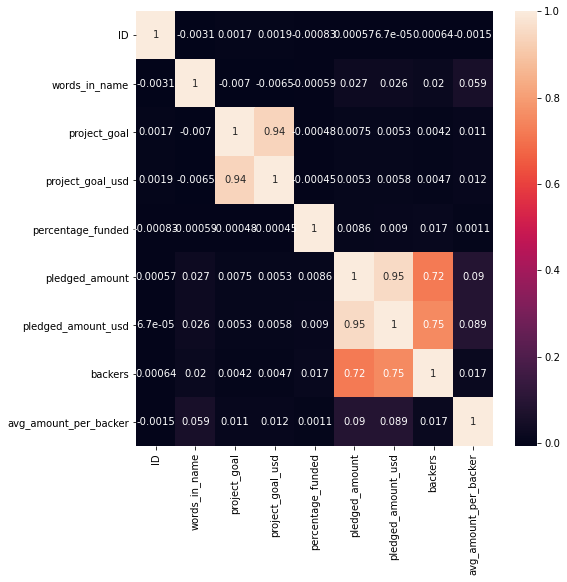

In [25]:
plt.figure(figsize=(8,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

### 2.1 (turn "success" to 1 and "fail" + "cancelled" to 0)

In [26]:
df['state_numeric'] = df['state']

In [27]:
df['state_numeric'] = df.state_numeric.map({"successful":1,
                                            "failed":0,
                                            "canceled":0
})

### 2.2 Create new DataFrames with only "failed", "successful", "cancelled" states

In [28]:
df_suc = df.loc[df['state'] == "successful"]
df_fail = df.loc[df['state'] == "failed"]
df_can = df.loc[df['state'] == "canceled"]

### 2.3 Do individual corr

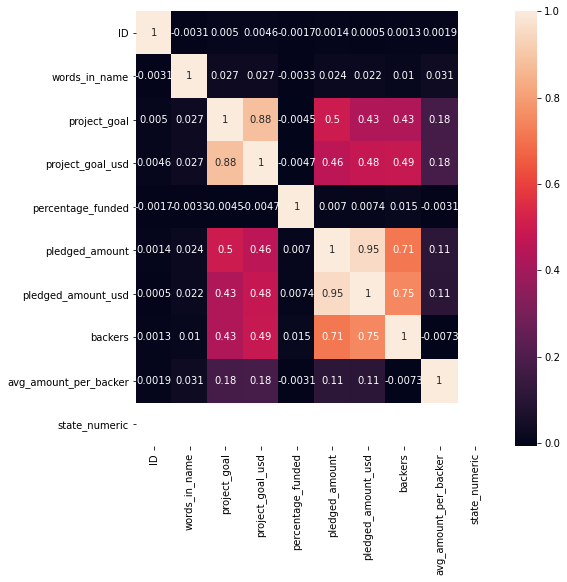

In [29]:
plt.figure(figsize=(8,8))
corrMatrix = df_suc.corr()
sns.heatmap(corrMatrix, annot=True)

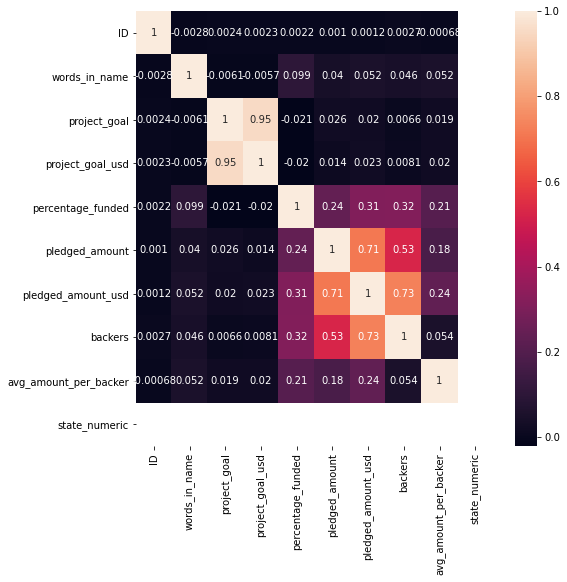

In [30]:
plt.figure(figsize=(8,8))
corrMatrix = df_fail.corr()
sns.heatmap(corrMatrix, annot=True)

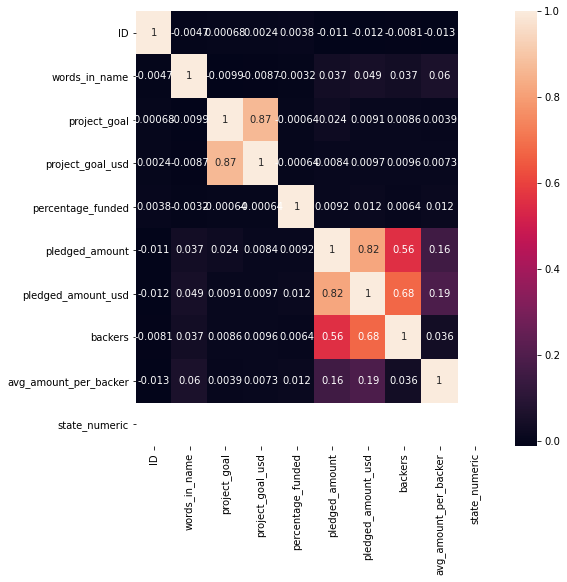

In [31]:
plt.figure(figsize=(8,8))
corrMatrix = df_can.corr()
sns.heatmap(corrMatrix, annot=True)

### 2.4 Group by main_category % of success = ?

In [32]:
cat_df = df.groupby("main_category").agg({"ID": "count", "state_numeric": "sum"})
cat_df["success_rate"] = cat_df["state_numeric"] / cat_df["ID"]
cat_df = cat_df.sort_values(by=["success_rate"])
cat_df

ID  state_numeric  success_rate
main_category                                    
Technology     31765           6434      0.202550
Journalism      4672           1012      0.216610
Crafts          8661           2115      0.244198
Fashion        22425           5593      0.249409
Food           24265           6085      0.250773
Photography    10675           3305      0.309602
Publishing     39047          12300      0.315005
Design         29516          10550      0.357433
Games          34723          12518      0.360510
Film & Video   62282          23623      0.379291
Art            27863          11510      0.413093
Music          49254          24197      0.491270
Comics         10720           5842      0.544963
Theater        10850           6534      0.602212
Dance           3736           2338      0.625803

visualize the differences, sort of predict? deep dive
use linear regression
sig suff.
get dummies - boolean column

### 2.5 Compare project duration with project success

In [33]:
df["funding_period"] = df.funding_period.dt.days

##### Fixing funding_period Outliers manually

In [34]:
df["funding_period"].max()

14867

In [35]:
df.loc[df["funding_period"] == 14733]

ID                                       project_name  \
247913  330942060  Help RIZ Make A Charity Album: 8 Songs, 8 Caus...   

        words_in_name main_category category        country currency  \
247913           16.0         Music    Music  United States      USD   

                  launched   deadline  funding_period  project_goal  \
247913 1970-01-01 01:00:00 2010-05-04           14733       10000.0   

        project_goal_usd  percentage_funded  pledged_amount  \
247913           10000.0                0.0             0.0   

        pledged_amount_usd     state  backers  avg_amount_per_backer  \
247913                 0.0  canceled        0                    0.0   

        state_numeric  
247913              0

In [36]:
df = df.drop(273779)
df = df.drop(247913)
df = df.drop(75397)
df = df.drop(94579)
df = df.drop(48147)
df = df.drop(2842)

### 2.6 Is there seasonal effect on amount of money spent in Kickstarter

In [37]:
df["launch_month"] = df["launched"].dt.strftime("%m")

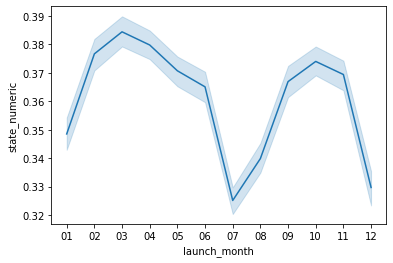

In [38]:
ax = sns.lineplot(x="launch_month", y="state_numeric", data=df)

year over year -> show differences
timeseries analysis, auto regression, moving avg, or combo!

### 2.7 What are the most used words in successful projects

Resetting indexes:

In [39]:
df_fail = df_fail.reset_index(drop=True)

In [40]:
df_suc = df_suc.reset_index(drop=True)

In [41]:
df_can = df_can.reset_index(drop=True)

In [42]:
pd.Series(' '.join(df_suc['project_name']).lower().split()).value_counts()[:60]

the            39259
-              21828
a              20569
of             14023
and             8874
for             8151
&               7226
to              7193
in              6709
new             6689
album           5553
film            5188
by              4742
project         3586
book            3433
your            2962
an              2961
with            2915
art             2902
short           2901
debut           2831
game            2779
first           2766
on              2705
music           2474
help            2439
from            2264
ep              1963
at              1878
is              1828
documentary     1671
|               1657
my              1625
you             1607
tour            1256
make            1249
series          1244
video           1243
album!          1241
about           1223
cards           1219
one             1195
cd              1171
festival        1166
record          1155
love            1140
world           1111
our          

##### What about failed projects

In [43]:
df_fail = df_fail.drop(86800)
df_fail = df_fail.drop(160317)
df_fail = df_fail.drop(176947)

In [44]:
pd.Series(' '.join(df_fail['project_name']).lower().split()).value_counts()[:60]

the            50618
-              25300
a              23661
of             19067
and            13454
for            12679
to             11017
in              8894
&               8453
new             5480
project         5367
your            5032
with            4507
book            4291
film            4140
by              4123
game            3859
album           3832
my              3798
art             3781
on              3665
music           3508
an              3373
help            3047
first           2797
from            2651
you             2384
life            2352
is              2264
world           2151
app             2136
series          2129
video           1891
i               1835
documentary     1828
short           1758
love            1673
food            1657
one             1644
at              1596
story           1584
debut           1544
all             1496
our             1489
novel           1474
me              1413
make            1387
|            

##### What about cancelled projects

In [45]:
pd.Series(' '.join(df_can['project_name']).lower().split()).value_counts()[:50]

(canceled)     23099
the             9940
-               6094
a               4671
of              3760
for             2644
and             2497
to              2011
&               1831
in              1639
game            1447
your            1219
new             1037
with             981
project          972
by               841
film             791
book             747
first            670
an               662
on               660
my               655
album            609
art              606
music            569
help             546
you              523
|                473
from             469
card             444
world            438
life             432
app              412
is               400
cards            387
series           384
one              354
playing          340
short            334
video            327
:                322
i                319
documentary      311
at               308
novel            302
world's          298
all              292
make         

### 2.8 Funding goal negatively corr with campaign success

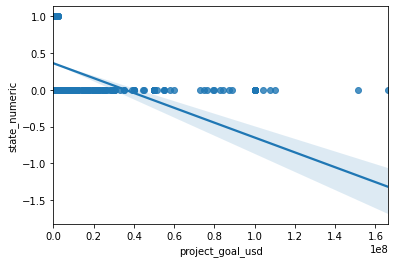

In [66]:
ax = sns.regplot(x="project_goal_usd", y="state_numeric", data=df)

In [ ]:
do a non-normalization, since usd are the same, check it out, use OLS to check stst. sig.

### 2.9 Length of the campaign title negatively corr with campaign success

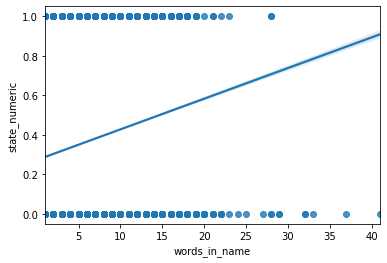

In [68]:
ax = sns.regplot(x="words_in_name", y="state_numeric", data=df)

In [70]:
df

ID                                       project_name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

        words_in_name main_category         category         country currency  \
0                 6.0    Publishing           Poetry  United Kingdom      GBP   
1                 8.0  Film & Video   Narrative Film   United States      USD   
2                 3.0  Film & Video   Narrative Film   United States      USD   
3                 7.0         Music            Music   United States      USD   
4                 8.0  Film & Video     Film & Video   United States      USD   
...               ...           ...              ...             ...      ...   
378656            6.0  Film & Video      Documentary   United States      USD   
378657            2.0  Film & Video   Narrative Film   United States      USD   
378658           11.0  Film & Video   Narrative Film   United States      USD   
378659            3.0    Technology       Technology   United States      USD   
378660            7.0           Art  Performance Art   United States      USD   

                  launched   deadline  funding_period  project_goal  \
0      2015-08-11 12:12:28 2015-10-09              59        1000.0   
1      2017-09-02 04:43:57 2017-11-01              60       30000.0   
2      2013-01-12 00:20:50 2013-02-26              45       45000.0   
3      2012-03-17 03:24:11 2012-04-16              30        5000.0   
4      2015-07-04 08:35:03 2015-08-29              56       19500.0   
...                    ...        ...             ...           ...   
378656 2014-09-17 02:35:30 2014-10-17              30       50000.0   
378657 2011-06-22 03:35:14 2011-07-19              27        1500.0   
378658 2010-07-01 19:40:30 2010-08-16              46       15000.0   
378659 2016-01-13 18:13:53 2016-02-13              31       15000.0   
378660 2011-07-19 09:07:47 2011-08-16              28        2000.0   

        project_goal_usd  percentage_funded  pledged_amount  \
0                1533.95           0.000000             0.0   
1               30000.00           0.080700          2421.0   
2               45000.00           0.004889           220.0   
3                5000.00           0.000200             1.0   
4               19500.00           0.065795          1283.0   
...                  ...                ...             ...   
378656          50000.00           0.000500            25.0   
378657           1500.00           0.103333           155.0   
378658          15000.00           0.001333            20.0   
378659          15000.00           0.013333           200.0   
378660           2000.00           0.262000           524.0   

        pledged_amount_usd     state  backers  avg_amount_per_backer  \
0                      0.0    failed        0               0.000000   
1                   2421.0    failed       15             161.400000   
2                    220.0    failed        3              73.333333   
3                      1.0    failed        1               1.000000   
4                   1283.0  canceled       14              91.642857   
...                    ...       ...      ...                    ...   
378656                25.0  canceled        1       

do analysis excluding the 10-100 $ goals
or reached- 
compare goal vs reached

most backed projects are the same? - check

where do do I want to go with this? Set story!


In [71]:
df

ID                                       project_name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

        words_in_name main_category         category         country currency  \
0                 6.0    Publishing           Poetry  United Kingdom      GBP   
1                 8.0  Film & Video   Narrative Film   United States      USD   
2                 3.0  Film & Video   Narrative Film   United States      USD   
3                 7.0         Music            Music   United States      USD   
4                 8.0  Film & Video     Film & Video   United States      USD   
...               ...           ...              ...             ...      ...   
378656            6.0  Film & Video      Documentary   United States      USD   
378657            2.0  Film & Video   Narrative Film   United States      USD   
378658           11.0  Film & Video   Narrative Film   United States      USD   
378659            3.0    Technology       Technology   United States      USD   
378660            7.0           Art  Performance Art   United States      USD   

                  launched   deadline  funding_period  project_goal  \
0      2015-08-11 12:12:28 2015-10-09              59        1000.0   
1      2017-09-02 04:43:57 2017-11-01              60       30000.0   
2      2013-01-12 00:20:50 2013-02-26              45       45000.0   
3      2012-03-17 03:24:11 2012-04-16              30        5000.0   
4      2015-07-04 08:35:03 2015-08-29              56       19500.0   
...                    ...        ...             ...           ...   
378656 2014-09-17 02:35:30 2014-10-17              30       50000.0   
378657 2011-06-22 03:35:14 2011-07-19              27        1500.0   
378658 2010-07-01 19:40:30 2010-08-16              46       15000.0   
378659 2016-01-13 18:13:53 2016-02-13              31       15000.0   
378660 2011-07-19 09:07:47 2011-08-16              28        2000.0   

        project_goal_usd  percentage_funded  pledged_amount  \
0                1533.95           0.000000             0.0   
1               30000.00           0.080700          2421.0   
2               45000.00           0.004889           220.0   
3                5000.00           0.000200             1.0   
4               19500.00           0.065795          1283.0   
...                  ...                ...             ...   
378656          50000.00           0.000500            25.0   
378657           1500.00           0.103333           155.0   
378658          15000.00           0.001333            20.0   
378659          15000.00           0.013333           200.0   
378660           2000.00           0.262000           524.0   

        pledged_amount_usd     state  backers  avg_amount_per_backer  \
0                      0.0    failed        0               0.000000   
1                   2421.0    failed       15             161.400000   
2                    220.0    failed        3              73.333333   
3                      1.0    failed        1               1.000000   
4                   1283.0  canceled       14              91.642857   
...                    ...       ...      ...                    ...   
378656                25.0  canceled        1       